In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Data_set/customer_shopping_data (TDI).csv')

data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,Invoice_Date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,8/5/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,11/9/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,5/16/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,10/24/2021,Kanyon


In [3]:
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'Invoice_Date', 'shopping_mall'],
      dtype='object')

### 1. Basic Information:
#####   - What is the total number of invoices in the dataset?
#####   - How many unique customers are there?
#####   - What is the average age of customers?



In [4]:
# Total number of invoices in the dataset
total_num_of_invoice = len(data['invoice_no'])

total_num_of_invoice

99457

In [5]:
# Number of unique customers
num_of_unique_customers = len(data['customer_id'].unique())

num_of_unique_customers

99457

In [6]:
# Average age of customers

ages = data['age']

average_age = np.average(ages)

average_age

43.42708909377922

In [7]:
rounded_up = np.round(average_age, 2)

rounded_up

43.43

### 2. Category Analysis:
####   - What are the unique categories of items in the dataset?
####   - Which category has the highest quantity sold?
####   - Can you find the average price for each category?


In [8]:
# The unique categories of items in the dataset
unique_category = pd.DataFrame(data.category.unique())

unique_category

,0
0,Clothing
1,Shoes
2,Books
3,Cosmetics
4,Food & Beverage
5,Toys
6,Technology
7,Souvenir


In [9]:
# category with the highest quantity sold

highest_quantity = np.max(data.quantity)
highest_category = data[data.quantity == highest_quantity].category.values[0]
print(f"The category with the highest quantity sold is: {highest_category} with a quantity of {highest_quantity}")

The category with the highest quantity sold is: Clothing with a quantity of 5


In [10]:
# The average price of each category

total_price = pd.DataFrame(data.groupby('category')['price'].sum())
total_price

,price
category,
Books,226977.30
Clothing,31075684.64
Cosmetics,1848606.90
Food & Beverage,231568.71
Shoes,18135336.89
Souvenir,174436.83
Technology,15772050.00
Toys,1086704.64


In [11]:
average_price = pd.DataFrame(data.groupby('category')['price'].mean())
average_price

,price
category,
Books,45.568621
Clothing,901.084021
Cosmetics,122.448626
Food & Beverage,15.671948
Shoes,1807.388568
Souvenir,34.894345
Technology,3156.935548
Toys,107.733185


### Payment Method Distribution:
#####   - What are the different payment methods used?
#####   - Create a pie chart to represent the distribution of payment methods.


In [13]:
payment_methods = pd.DataFrame(data.payment_method.unique())

payment_methods

,0
0,Credit Card
1,Debit Card
2,Cash


ValueError: could not convert string to float: 'Credit Card'

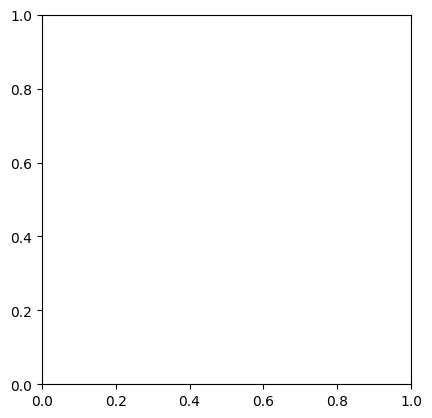

In [16]:
# Create a pie chart to represent the distribution of payment methods.
%matplotlib inline
import matplotlib.pyplot as plt

plt.pie(data.payment_method.unique())